ML Assignment 2

Md Nafis Islam
<br>Roll No 2206187
<br>Section IT-06

Github: https://github.com/nafis71041/logistic_regression

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading the Data

In [2]:
data_x = pd.read_csv('logisticX.csv', names=['x1', 'x2'])
data_y = pd.read_csv('logisticY.csv', names=['y'])

In [3]:
inputs_x = data_x.to_numpy()
targets_y = data_y.to_numpy()

#### Normalization

In [4]:
inputs_x_normalized = (inputs_x - inputs_x.mean(axis=0)) / inputs_x.std(axis=0)

#### Cost Function and Batch Gradient Descent functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function_J(inputs_x, targets_y, weights_w, bias_b):
    z = inputs_x @ weights_w + bias_b
    predictions = sigmoid(z)
    predictions = np.clip(predictions, 1e-9, 1 - 1e-9)
    cost = -np.mean(targets_y * np.log(predictions) + (1 - targets_y) * np.log(1 - predictions))
    return cost

def logistic_regression(inputs_x, targets_y, learning_rate=1e-3, max_iter=1e+5, tolerance=1e-9):
    m, n = inputs_x.shape
    
    weights_w = np.zeros((n, 1))
    bias_b = 0.0

    loss = [cost_function_J(inputs_x, targets_y, weights_w, bias_b)]

    for iter in range(int(max_iter)):
        predictions = sigmoid(inputs_x @ weights_w + bias_b)

        error = predictions - targets_y

        dJ_dw = (1 / m) * (inputs_x.T @ error)
        dJ_db = (1 / m) * np.sum(error)

        weights_w -= learning_rate * dJ_dw
        bias_b -= learning_rate * dJ_db

        current_loss = cost_function_J(inputs_x, targets_y, weights_w, bias_b)
        loss.append(current_loss)

        if abs(loss[-2] - loss[-1]) < tolerance:
            break
    
    return weights_w, bias_b, loss

- Use logistic regression to find decision boundary For the given database. Set your learning rate to 0.1.
- What is the cost function value and learning parameter value after convergence?

In [6]:
weights_w, bias_b, loss = logistic_regression(inputs_x_normalized, targets_y, learning_rate=0.1, max_iter=500)

w1, w2 = weights_w.ravel()
print(f"Decision Boundary: ({w1:.4f}) * x1 + ({w2:.4f}) * x2 + ({bias_b:.4f}) = 0")

print(f"\nCost Function Value: {loss[-1]:.4f}")
print(f"Weights: {w1:.4f} {w2:.4f}")
print(f"Bias: {bias_b:.4f}")

Decision Boundary: (2.1087) * x1 + (-2.1774) * x2 + (0.2260) = 0

Cost Function Value: 0.2332
Weights: 2.1087 -2.1774
Bias: 0.2260


- Plot cost function v/s iteration graph for the model trained in question 1.

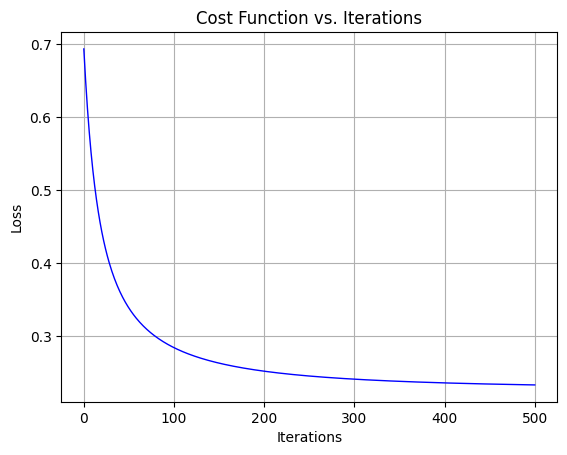

In [7]:
plt.plot(range(len(loss)), loss, color='blue', linewidth=1)
plt.title("Cost Function vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

- Plot the given dataset on a graph, use different colours for different classes
- show the decision boundary you obtained in question 1. Do not use scatter plot.

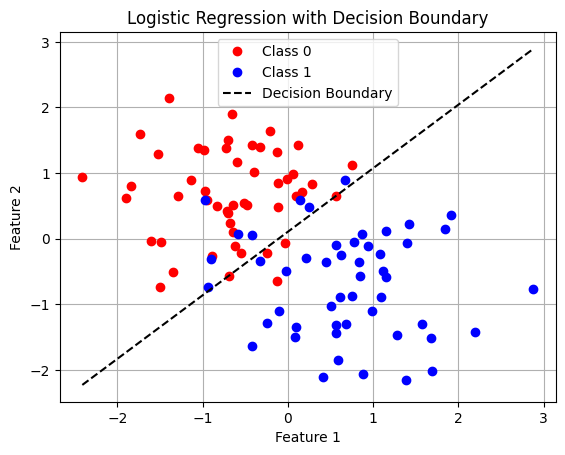

In [8]:
class_0 = inputs_x_normalized[targets_y.ravel() == 0]
class_1 = inputs_x_normalized[targets_y.ravel() == 1]

plt.plot(class_0[:, 0], class_0[:, 1], 'ro', label='Class 0')
plt.plot(class_1[:, 0], class_1[:, 1], 'bo', label='Class 1')

# Decision boundary: w1*x1 + w2*x2 + b = 0 → x2 = -(w1*x1 + b)/w2
x1_values = np.linspace(inputs_x_normalized[:, 0].min(), inputs_x_normalized[:, 0].max(), 100)
x2_values = -(weights_w[0] * x1_values + bias_b) / weights_w[1]
plt.plot(x1_values, x2_values, 'k--', label='Decision Boundary')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression with Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

- Train your model with a learning rate of 0.1 and 5.

- Plot the cost-function v/s iteration curve for both learning rates on the same graph. For this task, only train your model for 100 iterations.

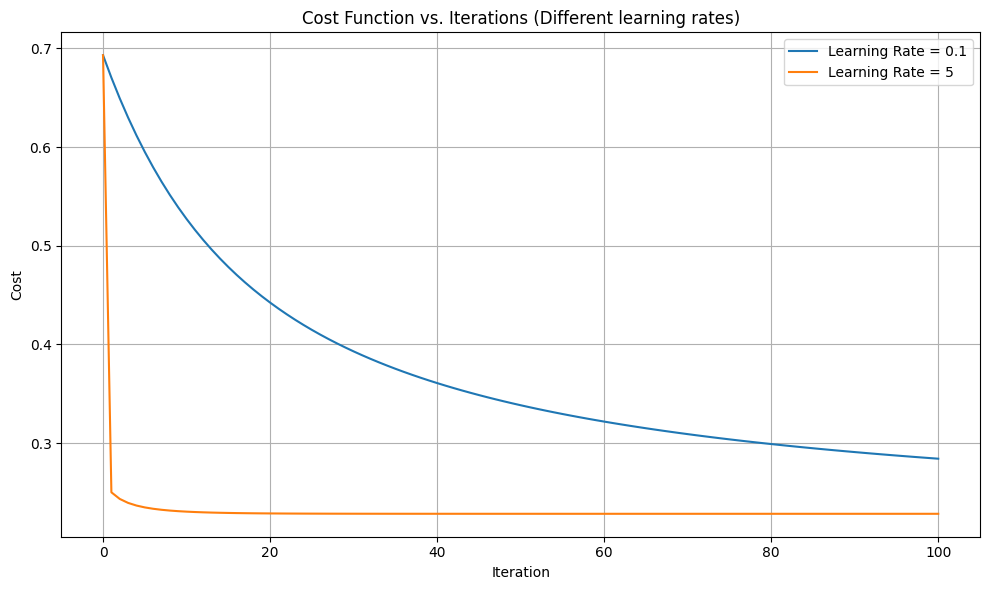

In [9]:
_, _, loss_01 = logistic_regression(inputs_x_normalized, targets_y, learning_rate=0.1, max_iter=100, tolerance=0)
_, _, loss_5 = logistic_regression(inputs_x_normalized, targets_y, learning_rate=5, max_iter=100, tolerance=0)

plt.figure(figsize=(10, 6))

plt.plot(loss_01, label='Learning Rate = 0.1')
plt.plot(loss_5, label='Learning Rate = 5')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations (Different learning rates)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Find the confusion matrix for your training dataset.
- Using the confusion matrix to calculate the accuracy, precision, recall, F1-score.

In [10]:
def predict(inputs_x, weights_w, bias_b, threshold=0.5):
    z = inputs_x @ weights_w + bias_b
    probs = sigmoid(z)
    return (probs >= threshold).astype(int)

def compute_confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

def compute_metrics(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * precision * recall / (precision + recall)
    return accuracy, precision, recall, f1_score

weights_w, bias_b, _ = logistic_regression(inputs_x_normalized, targets_y)
y_pred = predict(inputs_x, weights_w, bias_b)

TP, TN, FP, FN = compute_confusion_matrix(targets_y, y_pred)
print(f'''Confusion Matrix:
-------------
| {TP:03d} | {FP:03d} |
-------------
| {FN:03d} | {TN:03d} |
-------------''')

accuracy, precision, recall, f1_score = compute_metrics(TP, TN, FP, FN)

print(f"\nAccuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1_score:.4f}")

Confusion Matrix:
-------------
| 042 | 003 |
-------------
| 008 | 047 |
-------------

Accuracy  : 0.8900
Precision : 0.9333
Recall    : 0.8400
F1-Score  : 0.8842
